In [27]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv('C:\\Users\\prask\\OneDrive\\Desktop\\CODING\\Iris\\iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
# delete a column
df = df.drop(columns = ['Id'])
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
# to display stats about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
# to basic info about datatype
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [32]:
# to display no. of samples on each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [33]:
# check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Some Other Analysis

<Axes: >

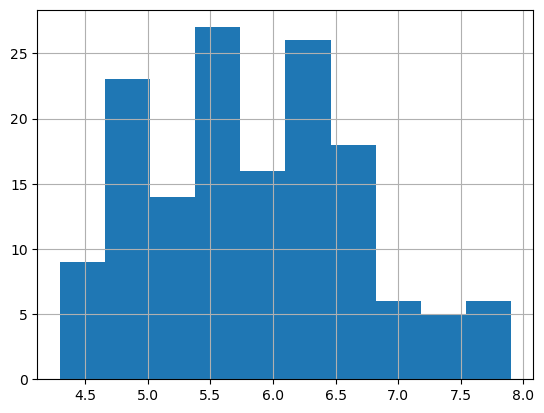

In [34]:
# histograms
df['SepalLengthCm'].hist()

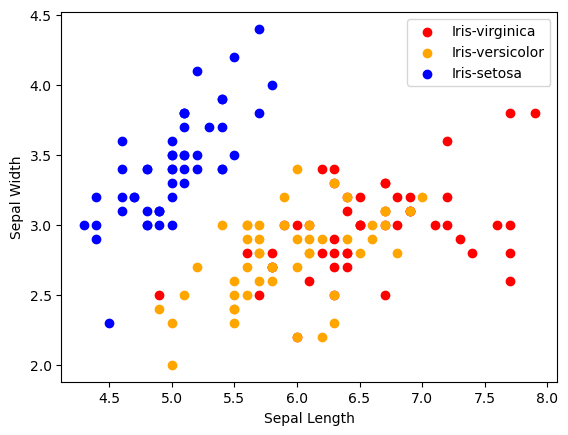

In [35]:
# scatterplot
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

<Axes: >

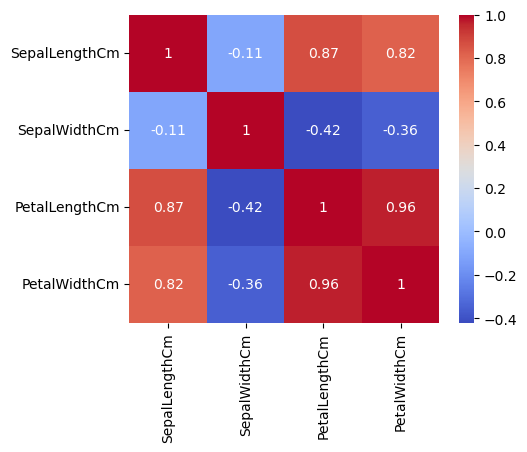

In [36]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

Covariance Matrix

<Axes: >

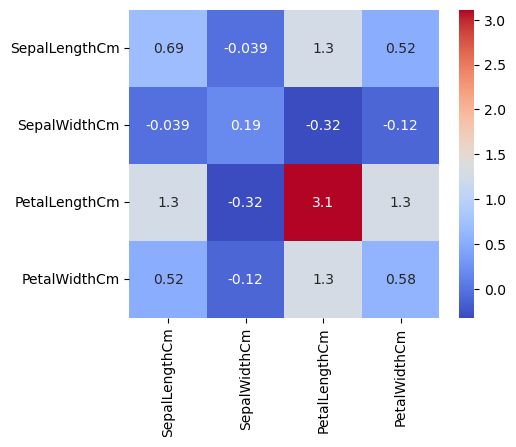

In [37]:
# Calculate the covariance matrix
covariance_matrix = df.cov()

fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(covariance_matrix, annot=True, ax=ax, cmap = 'coolwarm')


In [38]:
#Model Training
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [40]:
print("Accuracy:", model.score(x_test, y_test) * 100)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 91.11111111111111
Precision: 0.9155354449472096
Recall: 0.9111111111111111
F1 Score: 0.9107142857142857


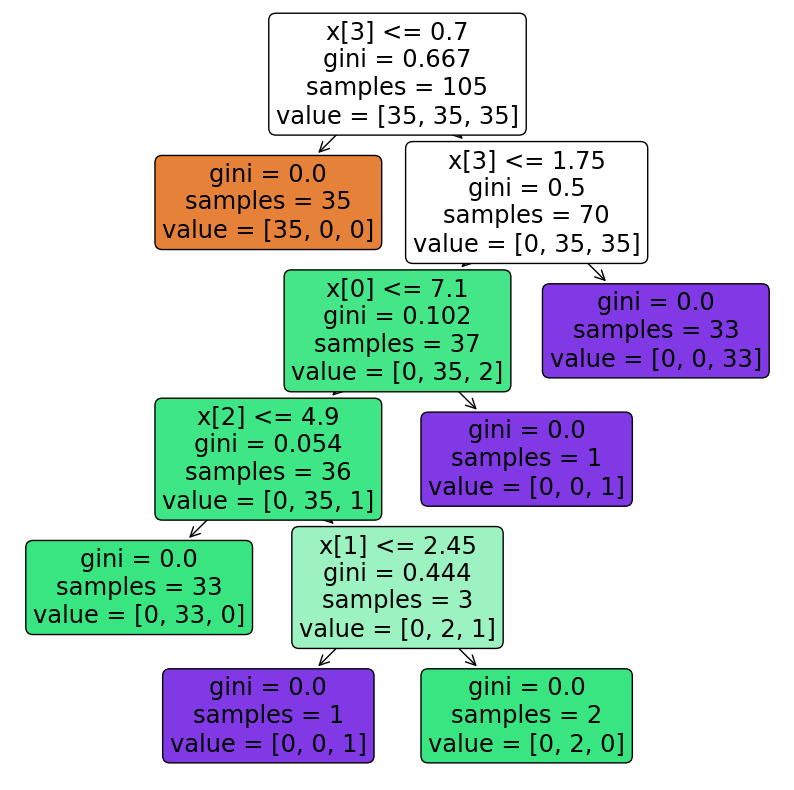

In [41]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 10))
plot_tree(model, filled=True, rounded=True)
plt.show()

Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model
rf_model.fit(x_train, y_train)

# Predict on the test set
rf_y_pred = rf_model.predict(x_test)

# Calculate metrics
rf_precision = precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = recall_score(y_test, rf_y_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_y_pred, average='weighted')
rf_accuracy = rf_model.score(x_test, y_test) * 100

print("Random Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)


Random Forest Metrics:
Accuracy: 91.11111111111111
Precision: 0.9155354449472096
Recall: 0.9111111111111111
F1 Score: 0.9107142857142857


Gradient Boosting

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=0)

# Train the model
gb_model.fit(x_train, y_train)

# Predict on the test set
gb_y_pred = gb_model.predict(x_test)

# Calculate metrics
gb_precision = precision_score(y_test, gb_y_pred, average='weighted')
gb_recall = recall_score(y_test, gb_y_pred, average='weighted')
gb_f1 = f1_score(y_test, gb_y_pred, average='weighted')
gb_accuracy = gb_model.score(x_test, y_test) * 100

print("Gradient Boosting Metrics:")
print("Accuracy:", gb_accuracy)
print("Precision:", gb_precision)
print("Recall:", gb_recall)
print("F1 Score:", gb_f1)


Gradient Boosting Metrics:
Accuracy: 93.33333333333333
Precision: 0.9345238095238095
Recall: 0.9333333333333333
F1 Score: 0.9332591768631814


Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
lr_model = LogisticRegression(random_state=0, max_iter=1000)

# Train the model
lr_model.fit(x_train, y_train)

# Predict on the test set
lr_y_pred = lr_model.predict(x_test)

# Calculate metrics
lr_precision = precision_score(y_test, lr_y_pred, average='weighted')
lr_recall = recall_score(y_test, lr_y_pred, average='weighted')
lr_f1 = f1_score(y_test, lr_y_pred, average='weighted')
lr_accuracy = lr_model.score(x_test, y_test) * 100

print("Logistic Regression Metrics:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)


Logistic Regression Metrics:
Accuracy: 95.55555555555556
Precision: 0.9555555555555556
Recall: 0.9555555555555556
F1 Score: 0.9555555555555556


Comparing all models

In [45]:
# Create a DataFrame to compare metrics
comparison_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Logistic Regression'],
    'Accuracy': [model.score(x_test, y_test) * 100, rf_accuracy, gb_accuracy, lr_accuracy],
    'Precision': [precision, rf_precision, gb_precision, lr_precision],
    'Recall': [recall, rf_recall, gb_recall, lr_recall],
    'F1 Score': [f1, rf_f1, gb_f1, lr_f1]
})

print("Model Comparison:")
print(comparison_df)


Model Comparison:
                 Model   Accuracy  Precision    Recall  F1 Score
0        Decision Tree  91.111111   0.915535  0.911111  0.910714
1        Random Forest  91.111111   0.915535  0.911111  0.910714
2    Gradient Boosting  93.333333   0.934524  0.933333  0.933259
3  Logistic Regression  95.555556   0.955556  0.955556  0.955556


In [46]:
#save the model
import pickle 
filename = 'savemodel.sav'
pickle.dump(model, open(filename, 'wb'))

In [47]:
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
31,5.4,3.4,1.5,0.4
66,5.6,3.0,4.5,1.5
32,5.2,4.1,1.5,0.1
137,6.4,3.1,5.5,1.8
68,6.2,2.2,4.5,1.5


In [48]:
load_model = pickle.load(open(filename,'rb'))

In [49]:
load_model.predict([[1.5, 2.2, 4.0, 1.0]])

array(['Iris-versicolor'], dtype=object)